### 2021-01-18 19일차

In [1]:
# 오늘 할 일

# 1. 컴활 실기 시험 보기 / clear
# 2. 코딩테스트 문제 풀기 / clear

##### 그래프 탐색 문제 1: 섬의 개수(실버 2)
https://www.acmicpc.net/problem/4963

In [2]:
import sys
from collections import deque

# 동서남북 / 대각선 확인
dx = [-1, 0, 1, 0, -1, -1, 1, 1]
dy = [0, -1, 0, 1, 1, -1, -1, 1]

def bfs():
    queue = deque()
    visited = [[0] * w for _ in range(h)]
    count = 0
    for i in range(h):
        for j in range(w):
            if lis[i][j] == 1 and visited[i][j] == 0:
                visited[i][j] = 1
                queue.append((i, j))
                count += 1
                while queue:
                    x, y = queue.popleft()
                    for k in range(8):
                        nx = x + dx[k]
                        ny = y + dy[k]
                        if 0 <= nx <= h-1 and 0 <= ny <= w-1 and lis[nx][ny] == 1 and visited[nx][ny] == 0:
                            queue.append((nx, ny))
                            visited[nx][ny] = 1
    return count

while True:
    w, h = map(int, sys.stdin.readline().split()) # input()
    if w == 0 and h == 0:
        break
    lis = []
    for i in range(h):
        lis.append(list(map(int, sys.stdin.readline().split())))
    print(bfs())

1 1
0
0
2 2
0 1
1 0
1
3 2
1 1 1
1 1 1
1
0 0


##### 그래프 탐색 문제 2: 안전 영역(실버 1)
https://www.acmicpc.net/problem/2468

In [14]:
import sys
from collections import deque

N = int(sys.stdin.readline()) # input()
lis = []; count_list = []

# 동서남북
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

for _ in range(N):
    lis.append(list(map(int, sys.stdin.readline().split())))

def bfs(deep):
    queue = deque()
    visited = [[0] * N for _ in range(N)]
    count = 0
    for i in range(N):
        for j in range(N):
            if lis[i][j] > deep and visited[i][j] == 0:
                queue.append((i, j))
                visited[i][j] = 1
                count += 1
                while queue:
                    x, y = queue.popleft()
                    for k in range(4):
                        nx = x + dx[k]
                        ny = y + dy[k]
                        if 0 <= nx <= N-1 and 0 <= ny <= N-1 and lis[nx][ny] > deep and visited[nx][ny] == 0:
                            queue.append((nx, ny))
                            visited[nx][ny] = 1
    return count

for d in range(max(max(lis))+1):
    count_list.append(bfs(d))
    
print(max(count_list))

5
6 8 2 6 2
3 2 3 4 6
6 7 3 3 2
7 2 5 3 6
8 9 5 2 7
5


##### 그래프 탐색 문제 3: 알파벳(골드 4)
https://www.acmicpc.net/problem/1987

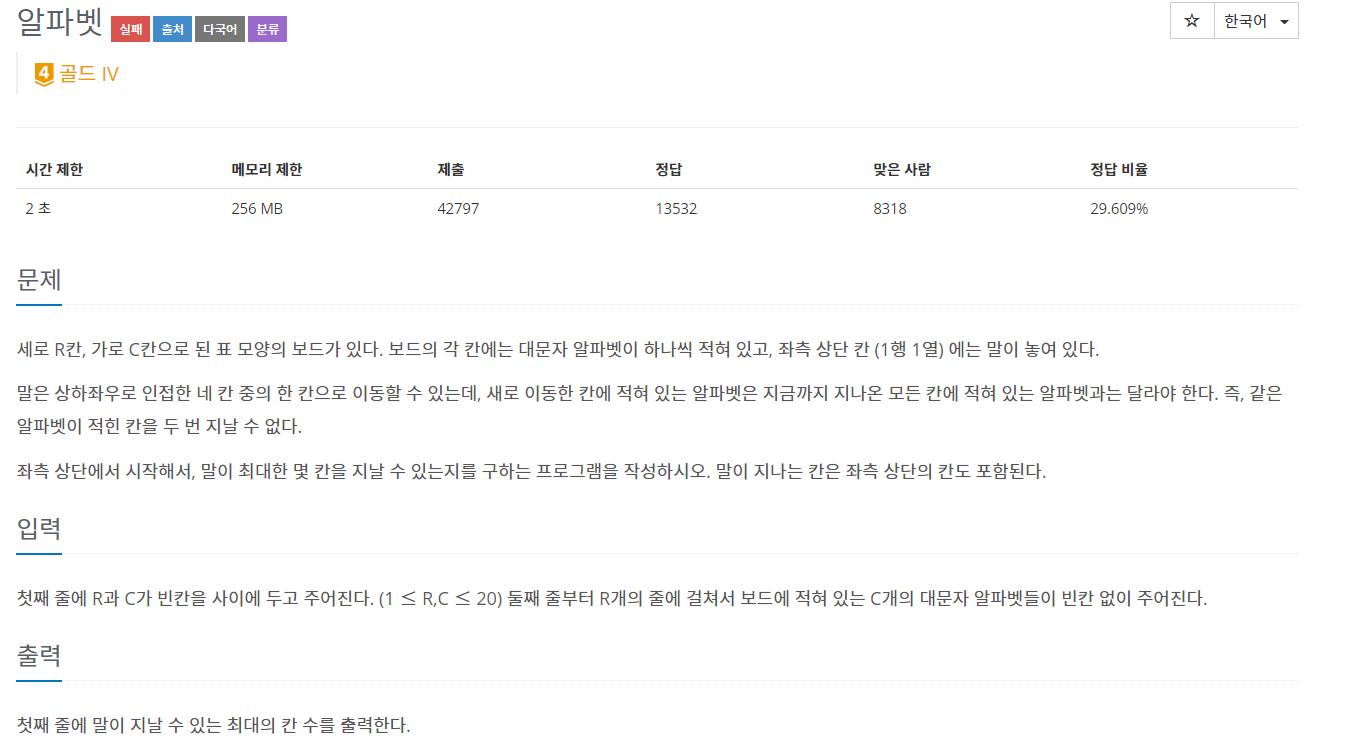

In [40]:
import sys
from collections import deque

R, C = map(int, input().split()) # sys.stdin.readline()
lis = [[0] * C for _ in range(R)]; store = []; visited = [[0] * C for _ in range(R)]
dx = [-1, 0, 1, 0]; dy = [0, -1, 0, 1]

for i in range(R):
    strr = input()
    for j in range(len(strr)):
        lis[i][j] = strr[j]       

def bfs():
    queue = deque()
    queue.append([0, 0])
    visited[0][0] = 1
    store = lis[0][0]
    while queue:
        i, j = queue.popleft()
        for k in range(4):
            nx = i + dx[k]
            ny = j + dy[k]
            if 0 <= nx < R and 0 <= ny < C and visited[nx][ny] == 0 and (lis[nx][ny] not in store):
                queue.append([nx, ny])
                visited[nx][ny] = 1
                store = store + lis[nx][ny]
                
    return len(store)

print(bfs())

2 4
CAAB
ADCB
3


In [43]:
import sys

R, C = map(int, input().split()) # sys.stdin.readline()
words = [list(input()) for _ in range(R)]
result = 0; dx = [-1, 0, 1, 0]; dy = [0, 1, 0, -1]

def backtraking(x, y, word):
    global result
    check = 0
    for k in range(4):  
        nx = x + dx[k]
        ny = y + dy[k]
        if 0 <= nx < R and 0 <= ny < C and words[nx][ny] not in word: 
            backtraking(nx, ny, word+words[nx][ny])
        else:
            check += 1

    if check == 4:
        result = max(result, len(word))
        return
    
backtraking(0, 0, words[0][0])
print(result)

2 4
CAAB
ADCB
3
